# Data Exploration & Cleaning Notebook

**Project**: Heart Disease Prediction

**Date**: 2026-01-20

The goals of this analysis are:

1) Perform a thorough analysis of the 

Column Descriptions:

| Var. Name |  Role | Type | Units | Notes |
|------|------|------|-------|-------|
|  Age |  Predictor  |  Int  | years | Age of the patient |
|  Sex |  Predictor  |  Categorical | N/A | Male/Female  |
| Chest Pain | Predictor | Categorical | N/A | Chest pain type |
| Rest BP | Predictor | Integer | mmHg | Resting blood pressure (on admission to the hospital) |
| Chol | Predictor | Integer | mg/dl | Serum cholesterol |
| FBS | Predictor | Categorical | N/A | Fasting blood sugar > 120 mg/dl |
| Rest ECG | Predictor | Categorical | N/A | Resting electrocardiographic results |
| Max HR | Predictor | Integer | bpm | 	Maximum heart rate achieved |
| Ex Angina | Predictor | Categorical | N/A | exercise-induced angina |
| Oldpeak | Predictor | Integer |  mm | ST depression induced by exercise relative to rest |
| Slope | Predictor | Categorical | N/A | The slope of the peak exercise ST segment |
| Ca | Predictor |  Integer | N/A | Number of major vessels (0-3) colored by fluoroscopy |
| Thal | Predictor | Categorical | N/A | normal; fixed defect; reversible defect | 
| CVD Class | Target | Integer | N/A | Diagnosis of heart disease (0-4) |

Additional Information:

Chest Pain Type: 
 typical angina, atypical angina, non-anginal, asymptomatic

Rest ECG: 
normal, stt abnormality, lv hypertrophy

Thal: 
normal; fixed defect; reversible defect

CVD Class
0=no heart disease; 1,2,3,4 = stages of heart disease 

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import chi2_contingency

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
from load_datasets import df_combined as df

df.head()

,Age,Sex,Chest Pain,Rest BP,Chol,FBS,Rest ECG,Max HR,Ex Angina,Oldpeak,Slope,Ca,Thal,CVD Class,Dataset
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Cleveland
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Cleveland
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Cleveland
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Cleveland
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,Cleveland


In [11]:
print(f"=== Dataset Dimensions ===")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")

# Data types
print("\n=== Data Types ===")
print(df.dtypes.value_counts())
print("\nDetailed data types:")
print(df.dtypes)

# Basic info
print("\n=== Dataset Info ===")
df.info()

=== Dataset Dimensions ===
Rows: 916, Columns: 15

=== Data Types ===
object     11
float64     3
int64       1
Name: count, dtype: int64

Detailed data types:
Age           float64
Sex           float64
Chest Pain    float64
Rest BP        object
Chol           object
FBS            object
Rest ECG       object
Max HR         object
Ex Angina      object
Oldpeak        object
Slope          object
Ca             object
Thal           object
CVD Class       int64
Dataset        object
dtype: object

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         916 non-null    float64
 1   Sex         916 non-null    float64
 2   Chest Pain  916 non-null    float64
 3   Rest BP     857 non-null    object 
 4   Chol        886 non-null    object 
 5   FBS         827 non-null    object 
 6   Rest ECG    914 non-null    object 


In [5]:
# Numeric columns
numeric_cols = df.select_dtypes(include="number").columns.tolist()

df[numeric_cols].describe().round(2)

,Age,Sex,Chest Pain,CVD Class
count,916.00,916.00,916.00,916.00
mean,53.54,0.79,3.26,1.00
std,9.37,0.41,0.93,1.14
min,29.00,0.00,1.00,0.00
25%,47.00,1.00,3.00,0.00
50%,54.00,1.00,4.00,1.00
75%,60.00,1.00,4.00,2.00
max,77.00,1.00,4.00,4.00


In [6]:
# Number of unique values in the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

unique_count = df[categorical_cols].nunique()

unique_count

Rest BP      103
Chol         335
FBS            5
Rest ECG       7
Max HR       198
Ex Angina      5
Oldpeak       82
Slope          7
Ca             8
Thal           7
Dataset        4
dtype: int64

In [10]:
from utils.data_quality import calculate_missingness_summary 
# Replacing all the question marks with NaN values
df = df.replace("?", np.nan)

missing_data = calculate_missingness_summary(dataframe=df)

missing_data.round(2)

,Feature,Missing_Count,Missing_Percent
0,Ca,608,66.38
1,Thal,483,52.73
2,Slope,308,33.62
3,FBS,89,9.72
4,Oldpeak,62,6.77
5,Rest BP,59,6.44
6,Ex Angina,55,6.00
7,Max HR,55,6.00
8,Chol,30,3.28
9,Rest ECG,2,0.22


Here we face a dillema with the missing values. I'll break them down into two categories: high missingness (>30% missing) and low missingness (<10% missing).

I want to use the best approach possible for dealing with these features. For example, might it be better to perform imputation on the columns that have low missingness (<10% of total rows)? For those that have a significant number of missing values (Ca, Thal, Slope), perhaps performing some kind of unsupervised learning method to approximate the most likely value using other features would make sense? Perhaps simply dropping the features would be sufficient.

When looking at the description of the high missingness features, we see that they are all cardiac stress test results that require specialized equipment or procedures, which explains why a large quantity are missing. Because they are medically significant indicators of cardiac health, simply dropping these predictors will likely not improve the model's performance.

- **ca**: number of major vessels (0-3) colored by flourosopy

- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

- **slope**: the slope of the peak exercise ST segment 
    -- Value 1: upsloping 
    -- Value 2: flat 
    -- Value 3: downsloping

For the other values, using simple imputation is likely to be fine. 

In [8]:
missing_cols = missing_data.index 

# Create binary missingness indicators
missing_matrix = df[missing_cols].isnull().astype(int)
missing_matrix.columns = [f"{col}_missing" for col in missing_cols]

# Calculate co-occurrence (correlation of missingness)
cooccurrence = missing_matrix.corr()

cooccurrence.head(3).round(2)

KeyError: 'None of [RangeIndex(start=0, stop=10, step=1)] are in the [columns]'

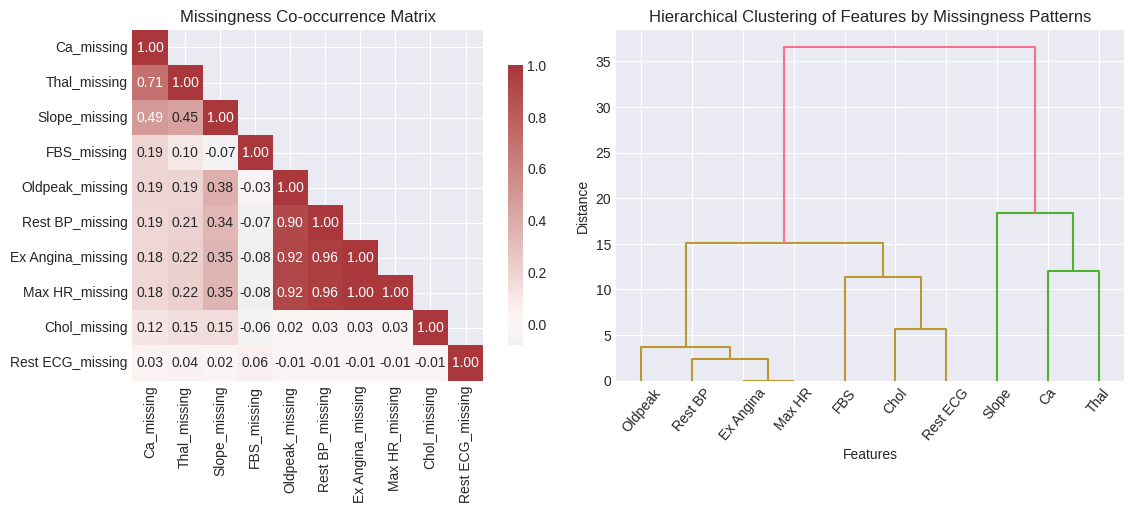

In [ ]:
# Plotting the correlation of missing features
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
mask = np.triu(np.ones_like(cooccurrence, dtype=bool), k=1)
sns.heatmap(cooccurrence, annot=True, fmt='.2f', cmap='vlag',
            center=0, square=True, mask=mask, cbar_kws={"shrink": 0.8}, ax=ax[0])
ax[0].set_title('Missingness Co-occurrence Matrix', )

# Cluster features by missingness patterns
linkage_matrix = linkage(missing_matrix.T, method='ward')

dendrogram(linkage_matrix, labels=[col.replace('_missing', '') 
                                    for col in missing_matrix.columns],
           leaf_rotation=50, leaf_font_size=10, ax=ax[1])
ax[1].set_title('Hierarchical Clustering of Features by Missingness Patterns')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Distance')


plt.tight_layout()
plt.show()

Looking at the results from this analysis, it is clear that the patterns in missingness are not a coincidence. The dendogram and correlation matrix confirm that Slope, Ca, and Thal have a high co-occurence rate and are clustered together. Nonetheless, other features that have lower missing incidence seem to have even greater correlation and smaller distances from each other than the features that are missing a significant amount of values.

This may indicate that certain regions perform these tests together, and others may forgo them entirely. It's a nice proxy visualization for the four different datasets that are merged together, indicating the population differences that exist between them.

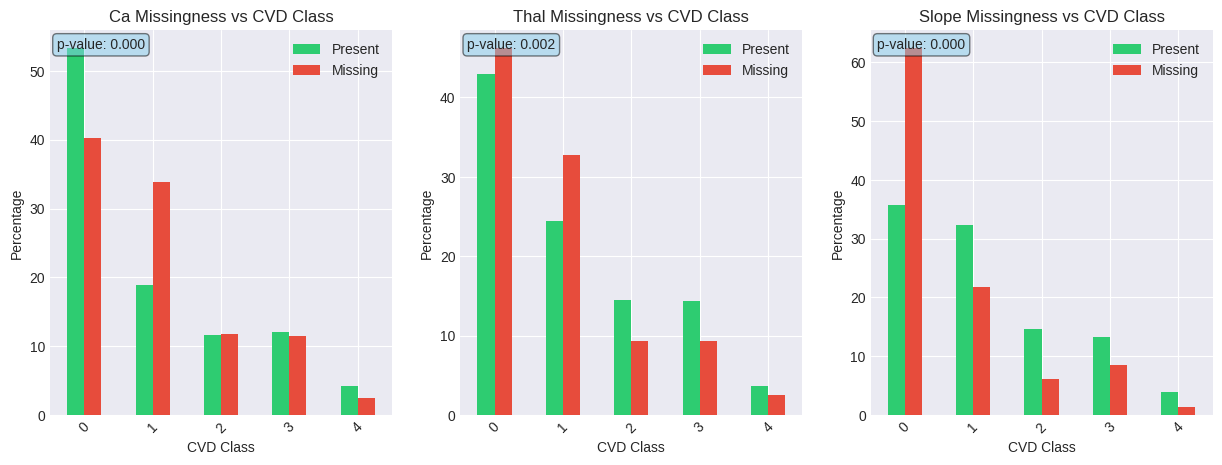

In [ ]:
# 
high_miss_features = ['Ca', 'Thal', 'Slope']
target_col = 'CVD Class'

# Create visualization
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

for idx, feature in enumerate(high_miss_features):
    if idx < len(high_miss_features):
        is_missing = df[feature].isnull()
        cross_tab = pd.crosstab(df[target_col], is_missing, normalize='columns') * 100
        
        cross_tab.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'{feature} Missingness vs {target_col}')
        axes[idx].set_xlabel(target_col)
        axes[idx].set_ylabel('Percentage')
        axes[idx].legend(['Present', 'Missing'], loc='best')
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
        
        # Chi-square test
        contingency = pd.crosstab(df[target_col], is_missing)
        chi2, p_value, dof, expected = chi2_contingency(contingency)
        axes[idx].text(0.02, 0.98, f'p-value: {p_value:.3f}', 
                        transform=axes[idx].transAxes, 
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='skyblue', alpha=0.5))

The results above suggest that the individuals who have missing values and those who have the values present across the top three missing predictors (Ca, Thal, Slope), come from a different population. This makes sense as the dataset is composed of individuals from different regions of the world (United States, Hungary, Switzerland) which may have very different lifestyles and diets, along with wealth (which may explain why )

As a result of this analysis we can confidently say there is a pattern that exists within the missing data, and therefore it is *Missing Not At Random (MNAR)*.

## Implications

- Missingness is structured by data source (different hospitals/regions).
- The populations are fundamentally different (lifestyle, diet, wealth, healtcare system).
- Missing tests likely reflect different diagnostic protocols rather than random omission.

## Verdict

Perhaps imputation should occur on a dataset-by-dataset basis. Since each dataset comes from a different population, an analysis of the different datasets; observing and quantifying their similarities and differences would be valuable. The end goal for this project is to build a model that is good at predicting what category of cardiovascular disease someone belongs to (0-4), where 0=no heart disease; 1,2,3,4 = stages of heart disease.

The hypothesis is that there are common factors regardless of the population we're studying that will influence the development, and as a result, the stage of heart disease in an individual. In this part of the project however, I want to quantify and explore the differences between the different datasets to gain a deeper understanding of the different populations.

This will be done in the next section below

In [ ]:
overview_stats = []
for name, _df in zip(dataset_names, dfs):
    analyzable_df = _df.replace('?', np.nan) # Important step as they won't be count as missing if this isn't done 

    total_cells = analyzable_df.shape[0] * analyzable_df.shape[1]
    missing_cells = analyzable_df.isnull().sum().sum()
    complete_cases = (~analyzable_df.isnull().any(axis=1)).sum()
    
    overview_stats.append({
        'Dataset': name,
        'N_Observations': analyzable_df.shape[0],
        'N_Features': analyzable_df.shape[1],
        'Complete_Cases': complete_cases,
        'Complete_Cases_%': (complete_cases / analyzable_df.shape[0] * 100),
        'Missing_Cells': missing_cells,
        'Missing_%': (missing_cells / total_cells * 100)
    })

overview_df = pd.DataFrame(overview_stats)

overview_df.round()

NameError: name 'dataset_names' is not defined

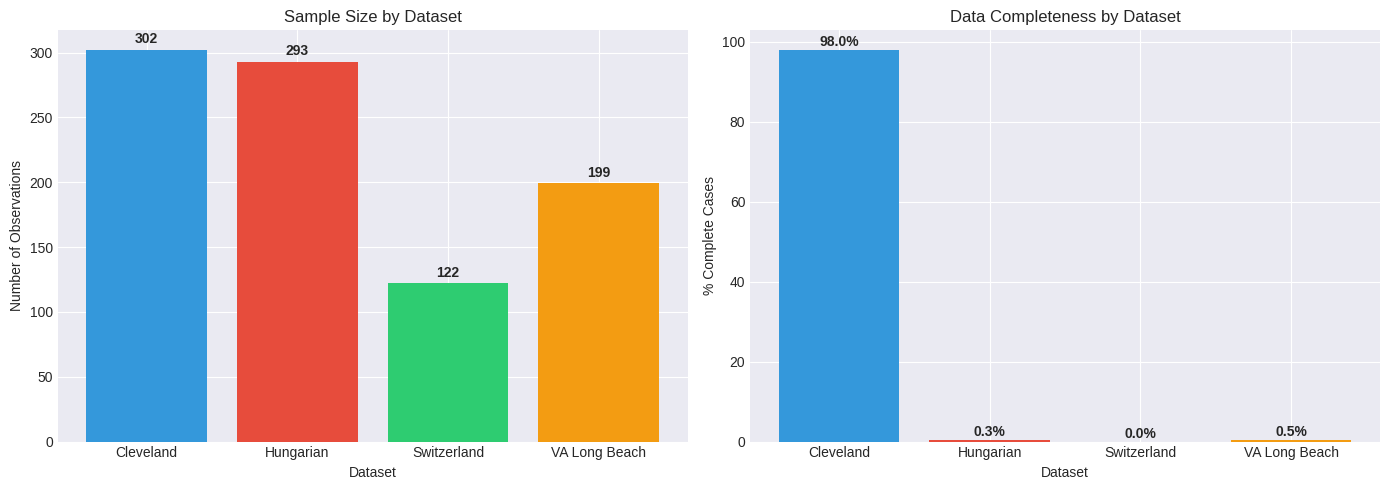

In [ ]:
# Visualize dataset sizes and completeness
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sample sizes
axes[0].bar(dataset_names, [_df.shape[0] for _df in dfs], 
            color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[0].set_title('Sample Size by Dataset')
axes[0].set_ylabel('Number of Observations')
axes[0].set_xlabel('Dataset')
for i, (name, _df) in enumerate(zip(dataset_names, dfs)):
    axes[0].text(i, _df.shape[0] + 5, str(_df.shape[0]), 
                ha='center', fontweight='bold')

# Completeness
completeness = [overview_stats[i]['Complete_Cases_%'] for i in range(len(dfs))]
axes[1].bar(dataset_names, completeness, 
            color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[1].set_title('Data Completeness by Dataset')
axes[1].set_ylabel('% Complete Cases')
axes[1].set_xlabel('Dataset')
axes[1].legend()
for i, val in enumerate(completeness):
    axes[1].text(i, val + 1, f'{val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate missingness percentage for each feature in each dataset
missingness_comparison = pd.DataFrame()

for name, _df in zip(dataset_names, dfs):
    analyzable_df = _df.replace('?', np.nan)
    miss_pct = (analyzable_df.isnull().sum() / len(analyzable_df) * 100).round(2)
    missingness_comparison[name] = miss_pct

missingness_comparison = missingness_comparison.drop('Dataset', errors='ignore')
missingness_comparison = missingness_comparison[missingness_comparison.sum(axis=1) > 0]

print("\nMissingness % by Feature and Dataset:")
missingness_comparison


Missingness % by Feature and Dataset:


,Cleveland,Hungarian,Switzerland,VA Long Beach
Rest BP,0.00,0.34,1.64,28.14
Chol,0.00,7.85,0.00,3.52
FBS,0.00,2.73,60.66,3.52
Rest ECG,0.00,0.34,0.82,0.00
Max HR,0.00,0.34,0.82,26.63
Ex Angina,0.00,0.34,0.82,26.63
Oldpeak,0.00,0.00,4.92,28.14
Slope,0.00,64.51,13.93,51.26
Ca,1.32,98.98,95.90,98.99
Thal,0.66,90.44,41.80,82.91


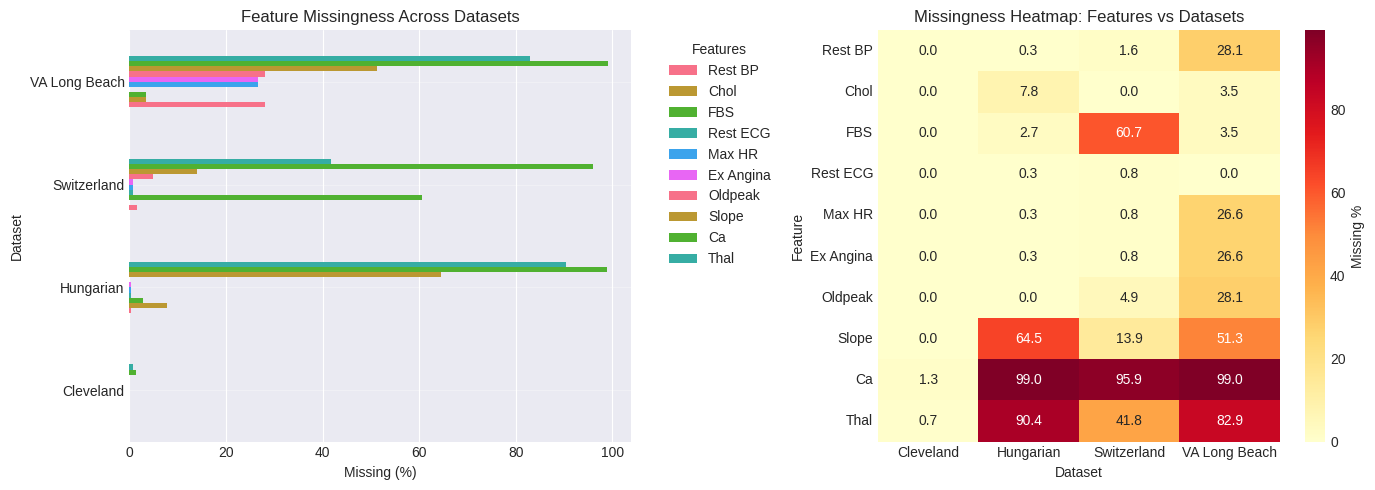

In [ ]:
# Visualize missingness patterns
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))

missingness_comparison.T.plot(kind='barh', ax=ax[0])
ax[0].set_title('Feature Missingness Across Datasets')
ax[0].set_ylabel('Dataset')
ax[0].set_xlabel('Missing (%)')
ax[0].legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].grid(axis='y', alpha=0.3)

# Heatmap version
sns.heatmap(missingness_comparison, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Missing %'}, ax=ax[1])
ax[1].set_title('Missingness Heatmap: Features vs Datasets')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

In [ ]:
# Cross-tabulation
cvd_crosstab = pd.crosstab(df['Dataset'], df['CVD Class'], 
                            margins=True, margins_name='Total')
print("\nAbsolute counts:")
print(cvd_crosstab)

# Percentage distribution (excluding margins)
cvd_pct = pd.crosstab(df['Dataset'], df['CVD Class'], 
                      normalize='index') * 100
print("\nPercentage distribution:")
print(cvd_pct.round(2))

# Chi-square test for independence
contingency = pd.crosstab(df['Dataset'], df['CVD Class'])
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"\nChi-square test for independence:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of freedom: {dof}")


Absolute counts:
CVD Class        0    1    2    3   4  Total
Dataset                                     
Cleveland      163   55   36   35  13    302
Hungarian      187  106    0    0   0    293
Switzerland      8   47   32   30   5    122
VA Long Beach   51   56   40   42  10    199
Total          409  264  108  107  28    916

Percentage distribution:
CVD Class          0      1      2      3     4
Dataset                                        
Cleveland      53.97  18.21  11.92  11.59  4.30
Hungarian      63.82  36.18   0.00   0.00  0.00
Switzerland     6.56  38.52  26.23  24.59  4.10
VA Long Beach  25.63  28.14  20.10  21.11  5.03

Chi-square test for independence:
Chi-square statistic: 255.0797
P-value: 1.1924e-47
Degrees of freedom: 12


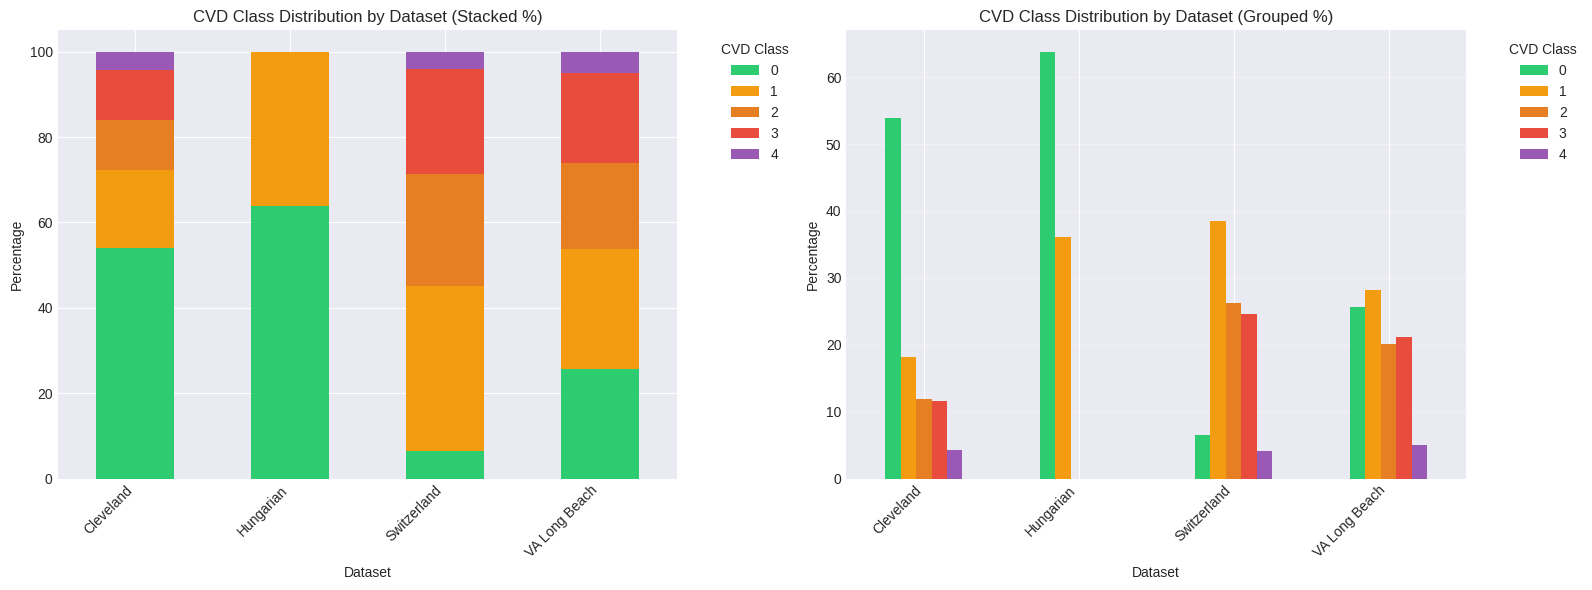

In [ ]:
# Visualizing the CVD class distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors= ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c', '#9b59b6']

# Stacked bar chart
cvd_pct.plot(kind='bar', stacked=True, ax=axes[0], color=colors)
axes[0].set_title('CVD Class Distribution by Dataset (Stacked %)')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='CVD Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Grouped bar chart
cvd_pct.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('CVD Class Distribution by Dataset (Grouped %)')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='CVD Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
categorical_features = ['Sex', 'Chest Pain', 'FBS', 'Rest ECG', 'Ex Angina']

for feature in categorical_features:
    print(f"\n--- {feature} ---")
    
    # Cross-tabulation
    crosstab = pd.crosstab(df['Dataset'], df[feature], 
                            margins=True, margins_name='Total')
    print("\nAbsolute counts:")
    print(crosstab)
    
    # Percentage distribution
    pct_tab = pd.crosstab(df['Dataset'], df[feature], 
                          normalize='index') * 100
    print("\nPercentage distribution:")
    print(pct_tab.round(2))
    
    # Chi-square test
    contingency = pd.crosstab(df['Dataset'], df[feature])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-square test: χ²={chi2:.4f}, p={p_value:.4e}")
    if p_value < 0.001:
        print(f"→ {feature} distribution is SIGNIFICANTLY different across datasets (p < 0.001)")
    elif p_value < 0.05:
        print(f"→ {feature} distribution is significantly different across datasets (p < 0.05)")
    else:
        print(f"→ No significant difference in {feature} distribution")


--- Sex ---

Absolute counts:
Sex            0.0  1.0  Total
Dataset                       
Cleveland       97  205    302
Hungarian       81  212    293
Switzerland     10  112    122
VA Long Beach    6  193    199
Total          194  722    916

Percentage distribution:
Sex              0.0    1.0
Dataset                    
Cleveland      32.12  67.88
Hungarian      27.65  72.35
Switzerland     8.20  91.80
VA Long Beach   3.02  96.98

Chi-square test: χ²=80.6382, p=2.2394e-17
→ Sex distribution is SIGNIFICANTLY different across datasets (p < 0.001)

--- Chest Pain ---

Absolute counts:
Chest Pain     1.0  2.0  3.0  4.0  Total
Dataset                                 
Cleveland       22   50   86  144    302
Hungarian       11  105   54  123    293
Switzerland      3    4   17   98    122
VA Long Beach    8   14   47  130    199
Total           44  173  204  495    916

Percentage distribution:
Chest Pain      1.0    2.0    3.0    4.0
Dataset                                 
Clevelan

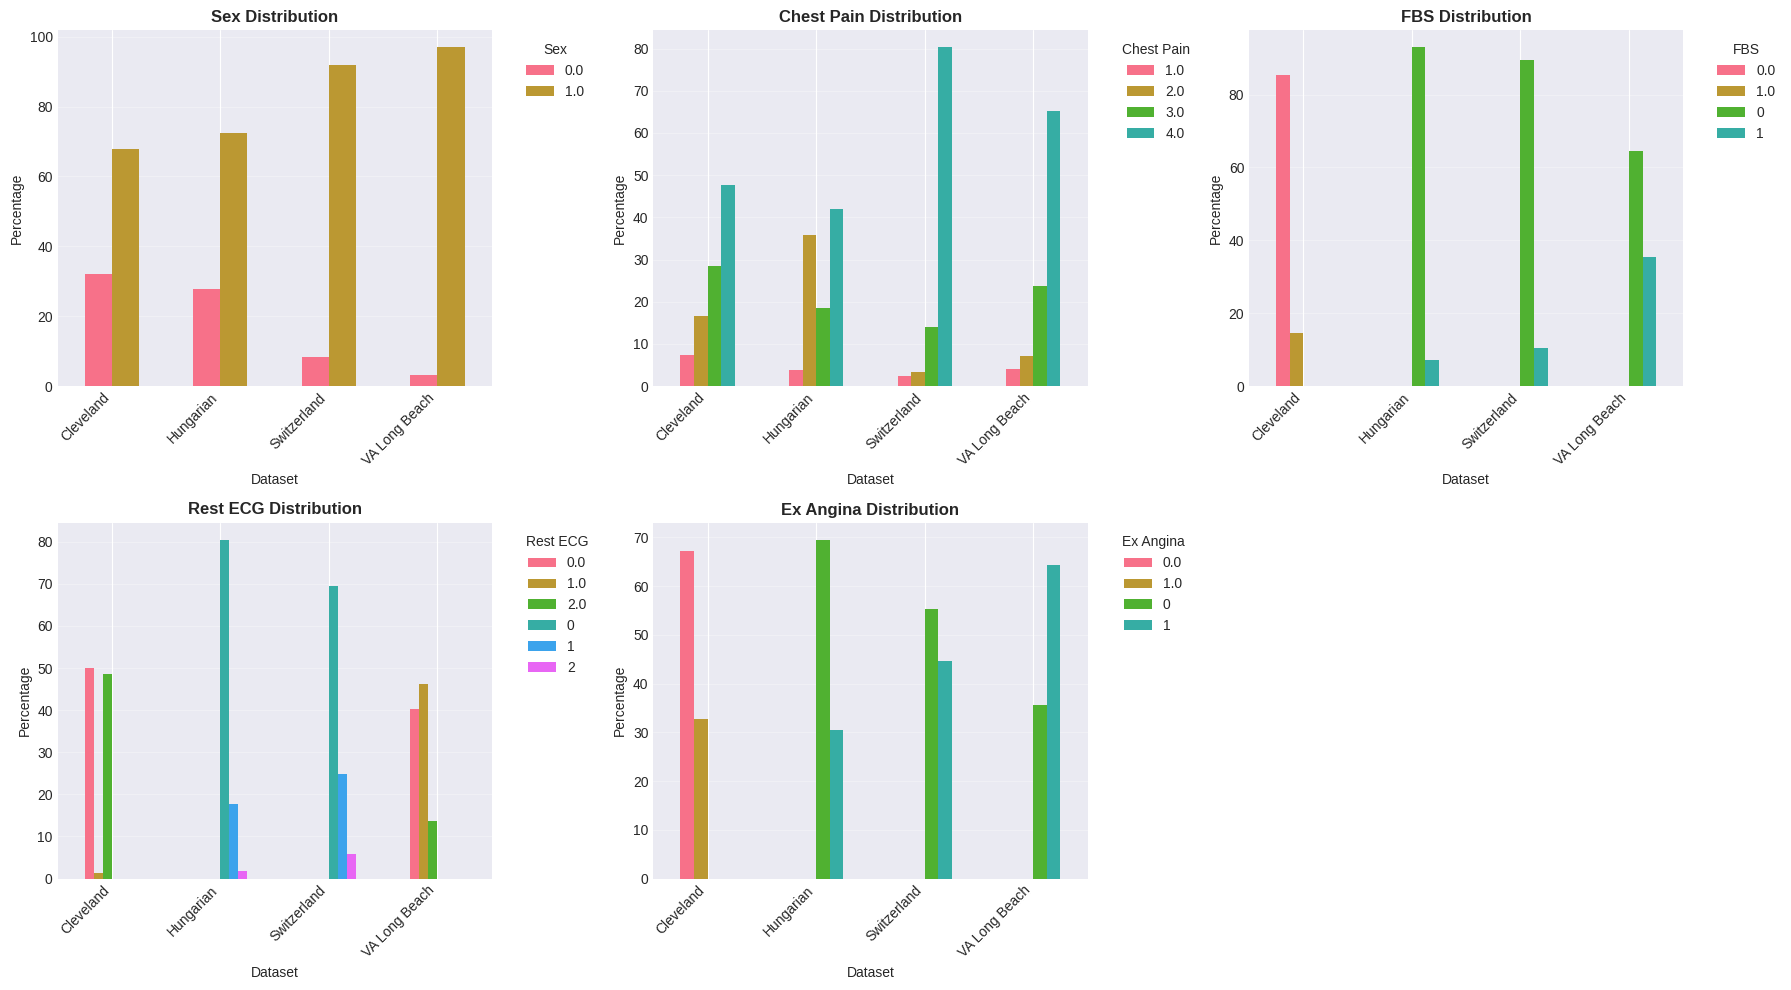

In [ ]:
# Visualize categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    pct_tab = pd.crosstab(df['Dataset'], df[feature], 
                          normalize='index') * 100
    pct_tab.plot(kind='bar', ax=axes[idx], stacked=False)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].set_xlabel('Dataset')
    axes[idx].set_ylabel('Percentage')
    axes[idx].legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)

axes[-1].set_visible(False)

plt.tight_layout()

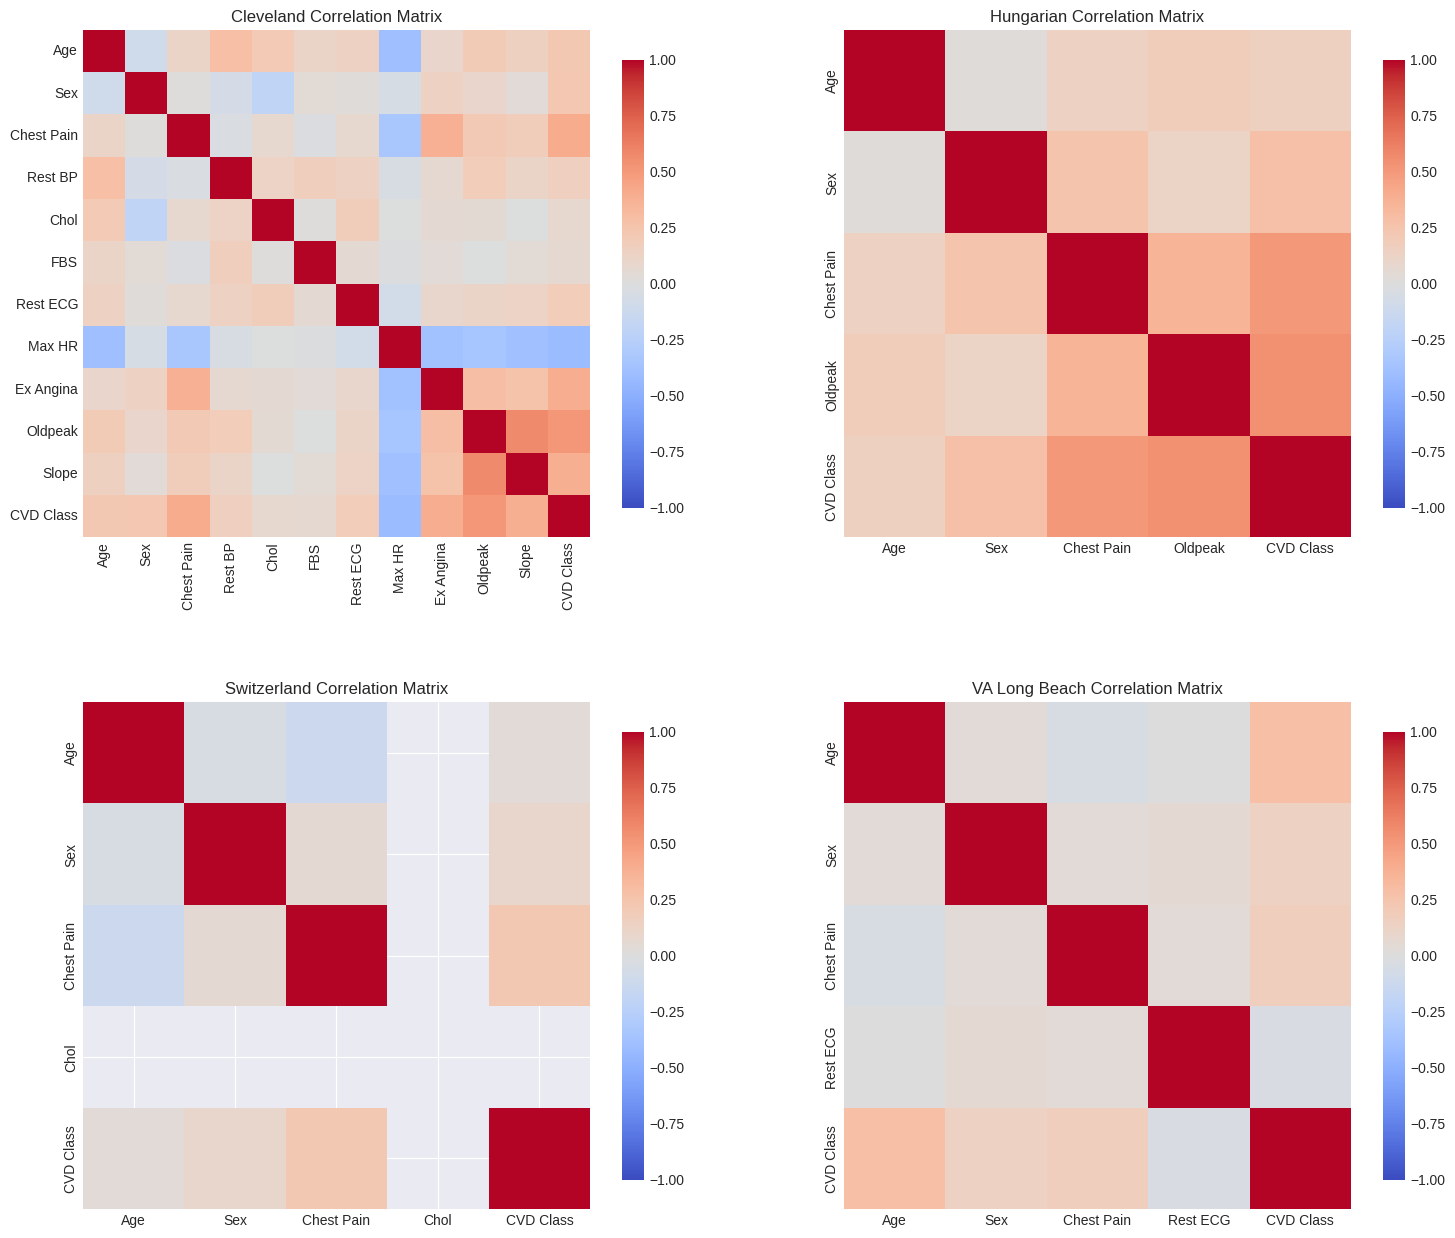

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
axes = axes.flatten()

for idx, (name, _df) in enumerate(zip(dataset_names, dfs)):
    # Select only numeric columns that exist
    numeric_cols = _df.select_dtypes(include=[np.number]).columns.tolist()
    if 'Dataset' in numeric_cols:
        numeric_cols.remove('Dataset')
    
    corr_matrix = _df[numeric_cols].corr()
    
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
                square=True, ax=axes[idx], cbar_kws={'shrink': 0.8},
                vmin=-1, vmax=1)
    axes[idx].set_title(f'{name} Correlation Matrix')